In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [97]:
excel_file = 'DATASET.xlsx'
FileData = pd.read_excel(excel_file)
FileData.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL0,CL0


In [98]:
data=FileData.values
print(data)
X=data[:,0:13]
Y=data[:,13:]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

[[1 0.49788 0.48246 ... 'CL0' 'CL0' 'CL0']
 [2 -0.07854 -0.48246 ... 'CL0' 'CL0' 'CL0']
 [3 0.49788 -0.48246 ... 'CL1' 'CL0' 'CL0']
 ...
 [1886 -0.07854 0.48246 ... 'CL2' 'CL0' 'CL0']
 [1887 -0.95197 0.48246 ... 'CL3' 'CL0' 'CL0']
 [1888 -0.95197 -0.48246 ... 'CL3' 'CL0' 'CL2']]


In [99]:
#Task1
array = []
def drugtest(true):
    if(np.any("CL3" == true) or np.any("CL4" == true) or np.any("CL5" == true) or np.any("CL6" == true)):
        array.append("USER")
    else:
        array.append("NOUSER")
        
np.apply_along_axis(drugtest,axis=1,arr=Y)
FileData["Newclass"]=array
FileData.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Semer,VSA,Newclass
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,NOUSER
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL0,CL0,USER
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,NOUSER
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL0,CL0,USER
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL0,CL0,NOUSER


0.7579505300353356


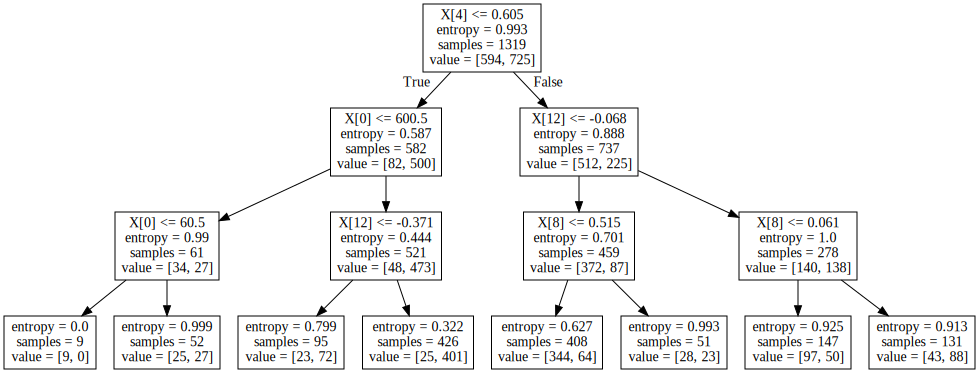

In [106]:
#Task 2:
from sklearn.tree import DecisionTreeClassifier
import graphviz
Y=data[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
S_entropy = DecisionTreeClassifier(criterion ='entropy', random_state = 100,max_depth = 3,min_samples_leaf = 5)
S_entropy.fit(x_train,y_train)
entropy_pred=S_entropy.predict(x_test)
print(accuracy_score(y_test,entropy_pred, normalize = True))
dot_data = tree.export_graphviz(S_entropy,out_file=None)
graph = graphviz.Source(dot_data)
graph

In [101]:
#task3:
data=FileData.values
X=data[:,0:13]
Y=data[:,-1]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)
task = GaussianNB()
task.fit(x_train,y_train)

GaussianNB(priors=None)
task_pred=task.predict(x_test)
accuracy_score(y_test,task_pred, normalize = True)

0.8091872791519434

In [102]:
#Task5:
from sklearn.neighbors import KNeighborsClassifier
task5=KNeighborsClassifier(n_neighbors=3)
task5.fit(x_train,y_train)
KNeighborsClassifier()
t_pred=task5.predict(x_test)
accuracy_score(y_test,t_pred, normalize = True)

0.8003533568904594

In [108]:
#Task4:
print("Precision for Entropy:-")
print(precision_score(y_test,entropy_pred, average=None))
print()
print("Classification report for Entropy:-")
print(classification_report(y_test,entropy_pred))
print("Confusion matrix for Entropy:-")
print(confusion_matrix(y_test,entropy_pred))
###############naive byes
print()
print("Precision for naive byes:-")
print(precision_score(y_test,task_pred, average=None))
print()
print("Classification report for naive byes:-")
print(classification_report(y_test,task_pred))
print("Confusion matrix for naive byes:-")
print(confusion_matrix(y_test,task_pred))
##############KNN
print()
print("Precision for KNN:-")
print(precision_score(y_test,t_pred, average=None))
print("Classification report for KNN:-")
print(classification_report(y_test,t_pred))
print("Confusion matrix for naive byes:-")
print(confusion_matrix(y_test,t_pred))

Precision for Entropy:-
[0.72244898 0.78504673]

Classification report for Entropy:-
             precision    recall  f1-score   support

     NOUSER       0.72      0.72      0.72       246
       USER       0.79      0.79      0.79       320

avg / total       0.76      0.76      0.76       566

Confusion matrix for Entropy:-
[[177  69]
 [ 68 252]]

Precision for naive byes:-
[0.77186312 0.85808581]

Classification report for naive byes:-
             precision    recall  f1-score   support

     NOUSER       0.77      0.83      0.80       246
       USER       0.86      0.81      0.83       320

avg / total       0.82      0.82      0.82       566

Confusion matrix for naive byes:-
[[203  43]
 [ 60 260]]

Precision for KNN:-
[0.80544747 0.87378641]
Classification report for KNN:-
             precision    recall  f1-score   support

     NOUSER       0.81      0.84      0.82       246
       USER       0.87      0.84      0.86       320

avg / total       0.84      0.84      0.84  

In [104]:
#task6:
rnd_task = RandomForestClassifier(max_depth=2, random_state=0)
rnd_task.fit(x_train,y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
print("Random Forest for Feature selection:-")
print(rnd_task.feature_importances_)
print("Accuracy for Random Forest Feature Selection:-")
rnd_pred=rnd_task.predict(x_test)
print(accuracy_score(y_test,rnd_pred, normalize = True))

Random Forest for Feature selection:-
[0.06483287 0.12296824 0.00809233 0.13269895 0.42362169 0.0008122
 0.02800344 0.         0.00168067 0.01587816 0.01198625 0.
 0.18942518]
Accuracy for Random Forest Feature Selection:-
0.8003533568904594
